# CHAPTER 2 - Statistical Estimation Problems

---
---

**Author:** Dr Giordano Scarciotti (g.scarciotti@imperial.ac.uk) - Imperial College London 

**Module:** ELEC70066 - Advanced Optimisation

**Version:** 1.2.0 - 04/01/2023

---
---

The material of this chapter is adapted from $[1]$.

This chapter covers the class of applied convex optimisation problems in the fields of *statistical approximation*. The chapter consists of two sections: 
*  In Section 2.1 we formulate the maximum likelihood estimation problem, we link this problem to the approximation problem seen in Chapter 1 and then we see two examples: counting events and assessing the probability of getting a disease. 
*  In Section 2.2 we formulate the optimal detector problem to test hypotheses. We work out an example which shows how scalarisation by weighted sum does not necessarily provide all the optimal Pareto points.

**Nota bene:** *The purpose of this chapter is to expose you immediately to important classes of applied optimisation problems to motivate the course. You should not expect to be able to grasp the mathematical details at this stage. Later in the course you will learn all the required knowledge to fully understand the theory of this chapter.*

# 2.1 Parametric Distribution Estimation

In [ ]:
from IPython.display import HTML
HTML('<iframe width="850" height="480" src="https://www.youtube.com/embed/F0pKFI23VuA"></iframe>')

**Errata:** At 18:56 the video says "optimal value". It should be "optimal point" (i.e. solution).  

## 2.1.1 Maximum likelihood estimation

Let $y$ be the number of traffic accidents in some region over some period, and $u_1$ be the total traffic flow through the region during the period, $u_2$ the rainfall in the region during the period, and so on. The counting of traffic accidents can be modelled by a [probability distribution](https://colab.research.google.com/drive/1WwNsPbW7-2PyVM_fXsOCUX7O7q8lQM3W#scrollTo=ZpyjDG4HTVEl&line=19&uniqifier=1), e.g. a [Poisson distribution](https://colab.research.google.com/drive/1WwNsPbW7-2PyVM_fXsOCUX7O7q8lQM3W#scrollTo=F3PtR1ZsU-RT), that relates the variables $y$ to the variables $u$. What we would like to estimate here are the parameters of the distribution so that given a new vector $u$ for day $j$ we can estimate the probability of having a certain number of accidents $y$ on that day. This is an example of **parametric distribution estimation**.

Consider a family of probability distributions on $\mathbb{R}^m$, indexed by a vector $x \in \mathbb{R}^n$, with [densities](https://colab.research.google.com/drive/1WwNsPbW7-2PyVM_fXsOCUX7O7q8lQM3W#scrollTo=ZpyjDG4HTVEl) $p_x(\cdot)$. $x$ here represents the parameters of the distribution (e.g. mean, variance, or more complicated statistical quantities). When considered as a function of $x$, for a fixed observed data $y\in\mathbb{R}^m$, the function $p_x(y)$ is called the **likelihood function**. As we will see, it is more convenient to work with its logarithm, so we define the **log-likelihood function** 

$$
l(x) = \log p_x(y).
$$

Constraints that represent prior knowledge can either be considered explicitly (i.e. $x\in C$) or incorporated in the likelihood function by assigning $p_x(y)=0$ whenever $x$ violate the prior information (thus the log-likelihood is $-\infty$). The optimisation problem that we want to solve is the **maximum likelihood (ML) estimation problem**, which consists of solving

$$
\begin{array}{ll}
\displaystyle\max_x &\log p_x(y)\\
\text{s.t.} &x\in C.
\end{array}\tag{1}
$$

In this problem $y$ is the observed data and $x$ is the variable (parameters of the distribution). Note that the maximiser of $\log p_x(y)$ is the same as the maximiser of $p_x(y)$, which is why we can consider the $\log$ without loss of generality. Problem $(1)$ is a convex optimisation problem if the log-likelihood function is concave for each $y$ and the $C$ is described by a set of linear equality and convex inequality constraints. This fact will be clear later in the course.




## 2.1.2 Relation between ML and penalty function approximation

Let us consider again the estimation problem of Chapter 1. Consider the linear measurement model

$$
y_i = a_i^\top x + v_i \qquad i = 1,\dots,m \tag{2}
$$

where $x\in\mathbb{R}^n$ is a vector that we want to estimate, $y_i\in\mathbb{R}$ are measured quantities and $v_i$ are measurement errors which are indipendent and identically distributed. Differently from Chapter 1, assume that $v_i$ are variables with density $p$ on $\mathbb{R}$. The likelihood function is given by

$$
p_x(y) = \prod_{i=1}^{m} p(y_i - a_i^\top x)
$$

So the ML problem is

$$
\max_x  \quad \sum_{i=1}^{m} \log p(y_i - a_i^\top x)
$$

If the density $p$ is log-convace (i.e. $\log p$ is concave) then this problem is convex and can be interpreted as an approximation problem (Chapter 1) with penalty function $\phi(\cdot) =  - \log p (\cdot)$.

Conversely, we can interpret any penalty function approximation problem

$$
\displaystyle \min_x  \quad \sum_{i=1}^{m} \phi(y_i - a_i^\top x)
$$

as a maximum likelihood estimation problem with noise density

$$
p(z) = \frac{e^{-\phi(z)}}{\int e^{-\phi(u)} du }
$$

and measurements $b$. This observation gives a statistical interpretation of the penalty function approximation problem. Suppose, for example, that the penalty function $\phi$ grows very rapidly for large values, which means that we attach a very large cost or penalty to large residuals. The corresponding noise density function $p$ will have very small tails, and the ML estimator will avoid (if possible) estimates
with any large residuals because these correspond to very unlikely events.





**Example 2.1:** (*Gaussian noise*) When $v_i$ in (2) are [Gaussian](https://colab.research.google.com/drive/1WwNsPbW7-2PyVM_fXsOCUX7O7q8lQM3W#scrollTo=GnMXhs7nXT7M) with zero mean and variance $\sigma^2$, i.e. they have density $p(z) = (2\pi \sigma^2)^{-1/2} e^{-z^2/(2\sigma^2)}$, then the log-likelihood is

$$
l(x) = -\frac{m}{2}\log(2\pi \sigma^2) - \frac{1}{2\sigma^2} ||Ax - y||_2^2,
$$

where $A$ is the matrix with rows $a_1^\top$, ..., $a_m^\top$. Therefore the ML solution is the solution of the least-square approximation problem. 

**Example 2.2:** (*Laplacian noise*) When $v_i$ in $(2)$ are [Laplacian](https://colab.research.google.com/drive/1WwNsPbW7-2PyVM_fXsOCUX7O7q8lQM3W#scrollTo=ezGKhrW89az2&line=13&uniqifier=1), i.e. they have density $p(z) = 1/(2a) e^{-|z|/a}$ with $a>0$, then the log-likelihood is

$$
l(x) = - m \log(2 a) - \frac{1}{a} ||Ax - y||_1.
$$

Therefore the ML solution is the solution of the $\ell_1$-norm approximation problem.

We can understand the robustness of the $\ell_1$-norm approximation to large errors in terms of maximum likelihood estimation. The Laplacian density has larger tails than the Gaussian, i.e., the probability of a very large $v_i$ is far larger with a Laplacian than with a Gaussian density. As a result, the associated maximum likelihood method expects to see greater numbers of large residuals.

## 2.1.3 Counting with the Poisson distribution

Counting events is often modelled using a [Poisson distribution](https://colab.research.google.com/drive/1WwNsPbW7-2PyVM_fXsOCUX7O7q8lQM3W#scrollTo=F3PtR1ZsU-RT&line=8&uniqifier=1) with mean $\mu>0$, namely

$$
\textbf{prob}(y = k) = \frac{e^{-\mu}\mu^k}{k!}.
$$

In a simple statistical model, the mean $\mu$ is modeled as an affine function of a vector $u \in \mathbb{R}^n$

$$
\mu = a^\top u + b.
$$

Here $u$ is called the vector of *explanatory variables* and $a\in\mathbb{R}^n$ and $b\in \mathbb{R}$ are the *model parameters*. For instance, consider again the traffic accidents problem and recall that $y$ is the number of traffic accidents in some region over some period. Then the explanatory variables are $u_1$ (the total traffic flow through the region during the period), $u_2$ (the rainfall in the region during the period), and so on. 



We are given a number of observations which consist of pairs $(u_i, y_i)$, $i = 1,\dots,m$. We want to determine the ML estimate of the model parameters $a$ and $b$. The likelihood function has the form

$$
\prod_{i=1}^m \frac{(a^\top u_i + b)^{y_i} e^{-(a^\top u_i +b)}}{y_i!}.
$$

Thus the convex optimisation problem that we want to solve is

$$
\max_{a,b}  \quad \sum_{i=1}^{m} \left( y_i \log (a^\top u_i + b) - (a^\top u_i + b)\right)
$$

where we dropped $-\log(y_i!)$ as it is an additive constant (so it will not change the optimal point, i.e. the solution $a^*$, $b^*$).

## 2.1.4 Logistic regression

Let $p$ be the probability of acquiring a certain disease. There are two possible states for an individual, namely $y=1$ means sick while $y=0$ means healthy. Thus, $y$ is a random variable in $\{0,1\}$ with 
$$
\textbf{prob}(y=1) = p, \qquad \textbf{prob}(y=0) = 1-p
$$
where $p \in [0,1]$. The probability $p$ is modelled as a logistic model 

$$
p = \frac{e^{a^\top u + b}}{1+e^{a^\top u + b}} \tag{3}
$$

as a function of some explanatory variables $u$, e.g. weight, age, height, blood pressure, and other medically relevant variables. The model paramters $a\in\mathbb{R}^n$ and $b\in\mathbb{R}$ determine how the probability $p$ varies as a function of the explanatory variable $u$. We can re-order the data so for $u_1$, ... , $u_q$, the outcome is $y = 1$, and for $u_{q+1}$, ... , $u_m$ the outcome is $y = 0$. The likelihood function then has the form

$$
\prod_{i=1}^q p_i \prod_{i=q+1}^m (1-p_i)
$$
where $p_i$ is given by $(3)$ evaluated at $u_i$. Finding the ML estimate of $a$ and $b$ is called logistic regression. The log-likelihood function is given by

$$
\begin{array}{rl}
l(a,b) &= \sum_{i=1}^q \log p_i + \sum_{i=q+1}^m \log(1-p_i) = \sum_{i=1}^q \log \frac{e^{a^\top u_i + b}}{1+e^{a^\top u_i + b}} + \sum_{i=q+1}^m \log \frac{1}{1+e^{a^\top u_i + b}}\\
&= \sum_{i=1}^q (a^\top u_i + b) - \sum_{i=1}^m \log(1+e^{a^\top u_i + b}).
\end{array}
$$

Since $l$ is a concave function of $a$ and $b$, (you will learn that) the logistic regression is a convex optimisation problem.









<div>
<img src="https://drive.google.com/uc?export=view&id=1LvNLKY0ODz0P00Df6yC98jw7s0C0rLeV" width="400"/>
</div>

Figure 2.1. *The dots represent $50$ data points. The data suggest that for $u < 5$, the outcome is more likely to be $y = 0$, while for $u > 5$, the outcome is more likely to be $y = 1$. The data
also suggest that for $u < 2$ or so, the outcome is very likely to be $y = 0$, and for $u > 8$ or so, the outcome is very likely to be $y = 1$. The curve represents the logistic function found by solving the maximum ML problem. Source: page 355 of $[1]$.*

# 2.2 Optimal Detector Design

In [ ]:
from IPython.display import HTML
HTML('<iframe width="850" height="480" src="https://www.youtube.com/embed/RRXq99X5Th4"></iframe>')

## 2.2.1 Formulation

Let $x$ be a random variable with values in $\{1, \dots, n\}$ with a distribution that depends on a parameter $\theta \in \{1, \dots, m\}$. The distribution of $x$ for the $m$ possible values of $\theta$ can be described by a matrix $P\in\mathbb{R}^{n \times m}$ of [conditional probabilities](https://colab.research.google.com/drive/1WwNsPbW7-2PyVM_fXsOCUX7O7q8lQM3W#scrollTo=rtFofLWOCFAK&line=5&uniqifier=1) with elements 

$$
p_{kj} = \textbf{prob}(x = k | \theta = j).
$$

Thus the $j$-th column of $P$ gives the probability distribution associated with the parameter value $\theta = j$. We consider the problem of guessing which distribution has generated an observed sample $x$. The $m$ values of $\theta$ are called hypotheses and the problem of guessing which hyphotesis is correct is called **hypothesis testing**. If one of the hypothesis correspons to a normal scenario, while the other $m-1$ hypothesis correspond to unlikely scenarios, then hypothesis testing can be interpreted as the problem of guessing if an event is normal or abnormal, and if so detect which unlikely event occured, by looking at the value of a measured variable $x$. In this case the hypothesis testing problem is also called **optimal detection problem**.




A standard parametrization for this problem makes use of a so-called randomised detector $T \in \mathbb{R}^{m \times n}$. A **randomized detector** $T$ is defined element-wise as

$$
t_{ik} = \textbf{prob}(\hat \theta = i | x = k).
$$

If we observe $x=k$, then the detector returns the hypothesis $\hat \theta = i$ with probability $t_{ik}$. The $k$-th column of $T$, which we denote $t_k$, gives the probability distribution of $\hat \theta$, when we observe $x = k$. If each column of $T$ is a [standard unit vector](https://en.wikipedia.org/wiki/Standard_basis), then the randomized detector is called **deterministic detector**. Consider for instance the randomized detector with column $j$ as $[0.8, 0.2]$ and the determnistic detector with column $j$ as $[1, 0]$. If our measurement is $x=j$ then the randomized detector tells us that the event occured is 1 with probability $0.8$ while the determinitic detector tells us that the event occured is 1 with certainty.




In our optimisation problem $T$ is our optimisation variable. We are interested in designing $T$ that defines the randomised (potentially deterministic) detector. This problems naturally requires the constraints 

$$
t_k \succcurlyeq 0 \quad \mathbf{1}^\top t_k = 1. 
$$

For the randomized detector defined by the matrix $T$, we define the **detection probability matrix** as $D = TP$. Thus the elements of $D$ are

$$
d_{ij} = (TP)_{ij} = \textbf{prob}(\hat \theta = i | \theta = j).
$$

So $d_{ij}$ is the probability of guessing $\hat \theta = i$ when in fact $\theta = j$. This matrix is also called **confusion matrix** in some fields, especially when it is $2$ by $2$. The diagonal elements of $D$, called **detection probabilities**, indicate the probability of true positives, i.e. probability of guessing $\hat \theta = i$ when $\theta = i$. The off-diagonal elements of $D$, called **error probabilities**, indicate the probability of false positives, the probability of returning $\hat \theta = i$ when it is $\theta = j$. If $D$ is the identity then the detector is **perfect**.  



We can also easily impose lower bounds on the probability of correctly detecting the $j$-th hipothesis by simply requiring

$$
d_{jj} \ge L_j,
$$

where $L_j$ is a threshold.



One can formulate several different optimal detector design problems. Here we consider two instances of a multi-objective optimisation problem. Consider $m(m-1)$ objectives given by the off-diagonal entries of $D$, which are the probabilities of different types of detection error

$$
\begin{array}{ll}
\displaystyle \min_T & D_{ij} \qquad i,j = 1,\dots,m, \quad i\ne j\\
s.t. &t_k \succcurlyeq 0, \quad \mathbf{1}^\top t_k = 1, \qquad k = 1, \dots, n.
\end{array}
$$

Recall that solving a multi-objective optimisation problem consists in determining the curve of Pareto optimal points. To this end we look at two scalarisation approaches: minimax and weighted sum.



The first approach that we take is the **minimax detector design problem**. Here we want to minimize the maximum error probability, i.e. $\max_j (1-D_{jj})$. So the problem can be formulated as

$$
\begin{array}{ll}
\displaystyle \min_T &\max_j 1-D_{jj}\\
s.t. &t_k \succcurlyeq 0, \quad \mathbf{1}^\top t_k = 1, \qquad k = 1, \dots, n.
\end{array}\tag{4}
$$

The minimax detector minimizes the worst-case (largest) probability of error over all $m$
hypotheses.



Another common approach involves the use of a **weighted sum**. We can scalarize the multiobjective problem by considering a weighted sum of the objectives

$$
\sum_{i,j=1}^m W_{ij}D_{ij} = \textbf{tr}(W^\top D) = \textbf{tr}(PW^\top T) = \sum_{k=1}^n c_{k}^\top t_{k} \tag{5}
$$
where $c_k$ is the $k$-th column of $WP^\top$ and $W$ is a matrix of weights. As usual, by solving the optimisation problems by spanning the values of the wieghts $W$ we find multiple points belonging to the Pareto optimal trade-off curve. Note that the parametrization $(5)$ is particularly nice because the constraints are separable, i.e. we have separate constraints on each $t_k$. Therefore, for each weight matrix $W$ one can solve $n$ simple linear programs

$$
\begin{array}{ll}
\displaystyle \min_{t_k} & c_k^\top t_k\\
s.t. &t_k \succcurlyeq 0, \quad \mathbf{1}^\top t_k = 1.
\end{array}
$$

We explore an application of the formulation presented above in the next section.

### Binary hypothesis testing

Consider the special case $m=2$ which is called binary hypothesis testing. The random variable $x$ is generated from one of two distributions,
which we denote $p \in \mathbb{R}^n$ and $q \in \mathbb{R}^n$. Usually this corresponds to scenarios in which hypothesis 1 is a normal situation while hypothesis 2 is an abnormal situation that we are trying to detect. Then if $\hat \theta = 1$ we say that the test for the abnormal scenario is negative, while if $\hat \theta = 2$ we say that the test for the abnormal scenario is positive. The detection probability matrix is usually expressed as

$$
D = \left[\begin{array}{cc}Tp & Tq\end{array}\right] = \left[\begin{array}{cc}1-P_{fp} & P_{fn}\\ P_{fp} & 1-P_{fn}\end{array}\right]
$$
where $P_{fn}$ is the probability of a false negative and $P_{fp}$ is the probability of a false positive. The Pareto optimal trade-off curve is called *receiver operating characterestic* (ROC). The curve depends only on the ratio of the weights, namely $\lambda = W_{12}/W_{21}$. Thus the weighted sum scalarisation of the multiobjective problem can be formulated as

$$
\begin{array}{ll}
\displaystyle \min_T & (Tp)_2 + \lambda (Tq)_1 = P_{fp}+\lambda P_{fn}\\
s.t. &t_{1k} + t_{2k} = 1, \quad t_{ik}\ge 0, \quad i=1,2, \quad k = 1, \dots, n
\end{array}\tag{6}
$$

It can be shown that the solution is

$$
(t_{1k},t_{2k}) = \left\{ \begin{array}{l}(1,0) \qquad p_k \ge \lambda q_k\\ (0,1) \qquad p_k < \lambda q_k  \end{array}\right.
$$

which is a determinitic detector which is called *likelihood ratio threshold test*. By choosing different values of the threshold,
we obtain (deterministic) Pareto optimal detectors that give different levels of
false positive versus false negative error probabilities. The likelihood ratio detectors do not give all the Pareto optimal detectors; they are just the vertices of the optimal trade-off curve, which is piecewise-linear. This is shown in the example below.


**Example 2.3:** For instance consider problem $(6)$ with 

$$
P = \left[\begin{array}{cc}0.70 & 0.10\\ 0.20 & 0.10 \\ 0.05 & 0.70 \\ 0.05 & 0.10\end{array}\right].
$$

The code that solves this problem and determines the optimal tradeoff curve is provided at the end of this example for the interested student. The optimal trade-off curve is shown below.


<div>
<img src="https://drive.google.com/uc?export=view&id=1sNiDqbitSCZqoc6LeQ0Iu6co_bWod2oU" width="500"/>
</div>


Figure 2.2. *Optimal trade-off curve between probability of a false negative ($P_{fn}$), and probability of a false positive ($P_{fp}$). The vertices of the trade-off curve, labeled 1, 2, 3, N and P, correspond to deterministic
detectors; the point labeled 4, which is a randomized detector, is the minimax
detector.*

We highlight 6 points. The left endpoint, labeled N, corresponds to the deterministic detector which is always negative, independently of the observed value of $x$; the right endpoint, labeled P, corresponds to the deterministic detector that is always positive. The vertices labelled $1$, $2$ and $3$ corresponds to the deterministic detectors

$$
T^{(1)}=\left[\begin{array}{cc}1 & 1 & 0 & 1\\ 0 & 0 & 1 & 0\end{array}\right],\quad T^{(2)}=\left[\begin{array}{cc}1 & 1 & 0 & 0\\ 0 & 0 & 1 & 1\end{array}\right], \quad T^{(3)}=\left[\begin{array}{cc}1 & 0 & 0 & 0\\ 0 & 1 & 1 & 1\end{array}\right].
$$

In fact, note that for instance $T^{(1)}P=\left[\begin{array}{cc}0.95 & 0.30\\ 0.05 & 0.70\end{array}\right]$ which corresponds to the point $(P_{fp},P_{fn})=(0.05,0.3)$ in the figure. These 5 detectors are obeined by solving Problem $(6)$. However, these detectors corresponpond only to the corner points of the piece-wise Pareto optimal curve. Thus, the remaining points cannot be obtained by scalarisation via weighted sum. Finally, point $4$ corresponds to the minimax detector obtained by solving Problem $(4)$

$$
T^{(4)}=\left[\begin{array}{cc}1 & 2/3 & 0 & 0\\ 0 & 1/3 & 1 & 1\end{array}\right]
$$

which yields equal probability of false positive and false negative, in this case $(P_{fp},P_{fn})=(1/6,1/6)$. No deterministic detector can achieve this Pareto optimal point.

### Code for the example above

In [ ]:
# We import the libraries
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define the given matrix P
P = np.array([[0.7,0.1],[0.2,0.1],[0.05,0.7],[0.05,0.1]])
n=4; m=2;

In [ ]:
# Declate the variables, define D and the constraints
T = cp.Variable((m,n))
D=T@P
constr = [cp.sum(T,0)==1, T>=0]

In [ ]:
# Declare values for lambda between 0 and 10
num_l=100
L=np.linspace(10, 0, num=num_l)
# Initialise variables
opt_val = np.zeros(num_l)
x = np.zeros(num_l)
y = np.zeros(num_l)
init=np.array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])
storeT = [init]
k=0

# Solve the scalarized problem
for i in range(num_l):
  obj = D[1][0]+L[i]*D[0,1]
  prob = cp.Problem(cp.Minimize(obj),constr)
  prob.solve()
  Dtmp = T.value@P
  x[i]=1-Dtmp[0][0]
  y[i]=1-Dtmp[1][1]
  # Whenever we find a new detector, we store it.
  if (not np.array_equal(storeT[k],np.round(T.value,2))):
    storeT = storeT + [np.round(T.value,2)]
    k=k+1

# It turns out that we found 5 detectors.
print("Scalarized detectors:")
print(storeT[1])
print(storeT[2])
print(storeT[3])
print(storeT[4])
print(storeT[5])

# This shows that here scalarization can find only 5 points on the Pareto 
# optimal curve

Scalarized detectors:
[[0. 0. 0. 0.]
 [1. 1. 1. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 1. 1.]]
[[1. 1. 0. 0.]
 [0. 0. 1. 1.]]
[[1. 1. 0. 1.]
 [0. 0. 1. 0.]]
[[1. 1. 1. 1.]
 [0. 0. 0. 0.]]


In [ ]:
# Declare the objective value of the minimax detector problem
# Solve the minimax problem and find T4
obj = cp.maximum(D[0][1],D[1][0])
prob = cp.Problem(cp.Minimize(obj),constr)
prob.solve()
MinMaxT=np.round(T.value,2)
print("Minmax detector:")
print(MinMaxT)

Minmax detector:
[[1.   0.67 0.   0.  ]
 [0.   0.33 1.   1.  ]]


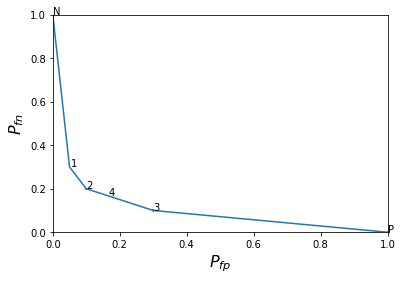

In [ ]:
# We generate the Figure 2.2
plt.plot(x,y)
plt.xlim((0,1))
plt.ylim((0,1))
plt.xlabel("$P_{fp}$",fontsize=16)
plt.ylabel("$P_{fn}$",fontsize=16)
plt.text((storeT[5]@P)[1][0],(storeT[5]@P)[0][1],'N')
plt.text((storeT[4]@P)[1][0],(storeT[4]@P)[0][1],'$1$')
plt.text((storeT[3]@P)[1][0],(storeT[3]@P)[0][1],'$2$')
plt.text((storeT[2]@P)[1][0],(storeT[2]@P)[0][1],'$3$')
plt.text((MinMaxT@P)[1][0],(MinMaxT@P)[0][1],'$4$')
plt.text((storeT[1]@P)[1][0],(storeT[1]@P)[0][1],'P')
plt.show()

# End of CHAPTER 2
